In [43]:
# Imports

# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [61]:
data = pd.read_csv('Training_Data_Encoded_v2.csv')

In [62]:
data.isnull().sum()

Unnamed: 0                                              0
ID                                                      0
Gender                                                  0
Race                                                    0
Age_at_Release                                          0
Residence_PUMA                                          0
Gang_Affiliated                                         0
Supervision_Risk_Score_First                          330
Supervision_Level_First                                 0
Education_Level                                         0
Dependents                                              0
Prison_Offense                                          0
Prison_Years                                            0
Prior_Arrest_Episodes_Felony                            0
Prior_Arrest_Episodes_Misd                              0
Prior_Arrest_Episodes_Violent                           0
Prior_Arrest_Episodes_Property                          0
Prior_Arrest_E

In [63]:
##data = data.replace(to_replace= np.nan, value = 0)
data = data.fillna(data.median())

In [64]:
data.isnull().sum()

Unnamed: 0                                           0
ID                                                   0
Gender                                               0
Race                                                 0
Age_at_Release                                       0
Residence_PUMA                                       0
Gang_Affiliated                                      0
Supervision_Risk_Score_First                         0
Supervision_Level_First                              0
Education_Level                                      0
Dependents                                           0
Prison_Offense                                       0
Prison_Years                                         0
Prior_Arrest_Episodes_Felony                         0
Prior_Arrest_Episodes_Misd                           0
Prior_Arrest_Episodes_Violent                        0
Prior_Arrest_Episodes_Property                       0
Prior_Arrest_Episodes_Drug                           0
Prior_Arre

In [6]:
print("Old data frame length:", len(data))
print("New data frame length:", len(new_data))
print("Number of rows with at least 1 NA value: ", (len(data)-len(new_data)))

Old data frame length: 18028
New data frame length: 13593
Number of rows with at least 1 NA value:  4435


In [65]:
## Train and Test Split
X = data.drop(['Recidivism_Within_3years_Combined','Unnamed: 0','ID'],axis=1)
y = data['Recidivism_Within_3years_Combined']

In [66]:
print(X.shape, y.shape)

(18028, 48) (18028,)


In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(12078, 48) (5950, 48) (12078,) (5950,)


In [72]:
## fit the model


model = RandomForestClassifier(random_state=42,n_estimators=2000)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=2000, random_state=42)

In [73]:
## make predictions
yhat = model.predict(X_test)

In [74]:
## evaluate predictions
acc = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % acc)

Accuracy: 0.577


<BarContainer object of 48 artists>

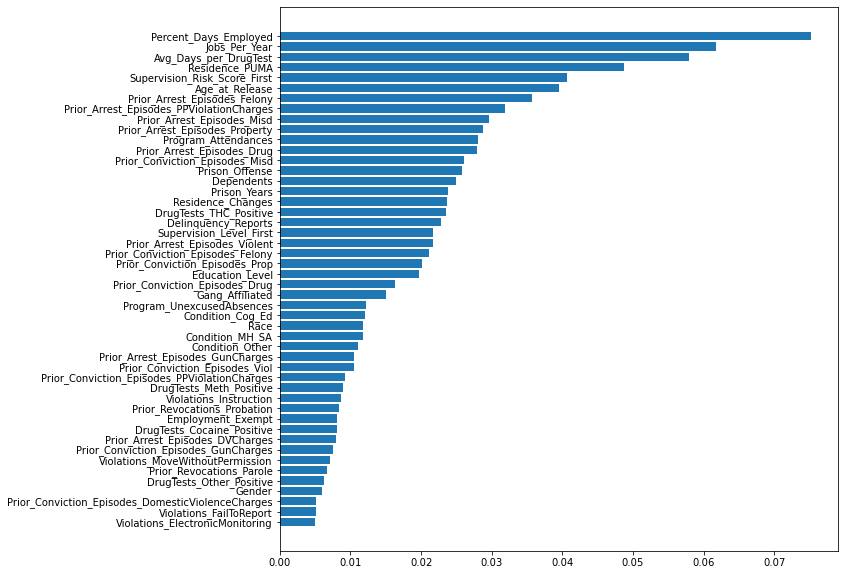

In [75]:
model_features=model.feature_importances_.argsort()
plt.figure(figsize=(10,10))
plt.barh(X.columns.values[model_features],model.feature_importances_[model_features])

In [86]:
##Test Data 2
data.pop('Prior_Conviction_Episodes_Drug')
data.pop('Gang_Affiliated')
data.pop('Program_UnexcusedAbsences')
data.pop('Condition_Cog_Ed')
data.pop('Race')
data.pop('Condition_MH_SA')
data.pop('Condition_Other')
data.pop('Prior_Arrest_Episodes_GunCharges')
data.pop('Prior_Conviction_Episodes_Viol')
data.pop('Prior_Conviction_Episodes_PPViolationCharges')
data.pop('DrugTests_Meth_Positive')
data.pop('Prior_Arrest_Episodes_DVCharges')
data.pop('Prior_Conviction_Episodes_GunCharges')
data.pop('Violations_MoveWithoutPermission')
data.pop('Prior_Revocations_Parole')
data.pop('DrugTests_Other_Positive')
data.pop('Gender')
data.pop('Prior_Conviction_Episodes_DomesticViolenceCharges')
data.pop('Violations_FailToReport')
data.pop('Violations_ElectronicMonitoring')

0        0
1        0
2        0
3        0
4        0
        ..
18023    0
18024    0
18025    1
18026    0
18027    0
Name: Violations_ElectronicMonitoring, Length: 18028, dtype: int64

In [87]:
data.head(5)

,Unnamed: 0,ID,Age_at_Release,Residence_PUMA,Supervision_Risk_Score_First,Supervision_Level_First,Education_Level,Dependents,Prison_Offense,Prison_Years,...,Delinquency_Reports,Program_Attendances,Residence_Changes,Avg_Days_per_DrugTest,DrugTests_THC_Positive,DrugTests_Cocaine_Positive,Percent_Days_Employed,Jobs_Per_Year,Employment_Exempt,Recidivism_Within_3years_Combined
0,0,1,5,16,3.0,2,0,3,0,3,...,0,7,2,612.000000,0.000000,0.0,0.488562,0.447610,0,0
1,1,2,3,16,6.0,1,2,1,3,3,...,4,0,2,35.666667,0.000000,0.0,0.425234,2.000000,0,1
2,2,3,6,24,7.0,0,0,3,0,0,...,4,7,0,93.666667,0.333333,0.0,0.000000,0.000000,0,2
3,3,4,4,16,7.0,0,2,1,2,0,...,0,7,3,25.400000,0.000000,0.0,1.000000,0.718996,0,0
4,4,5,3,16,4.0,1,2,3,3,0,...,0,8,0,23.117647,0.000000,0.0,0.203562,0.929389,0,3


In [90]:
data.pop('Unnamed: 0')
data.pop('ID')

0            1
1            2
2            3
3            4
4            5
         ...  
18023    26756
18024    26758
18025    26759
18026    26760
18027    26761
Name: ID, Length: 18028, dtype: int64

In [91]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [92]:
print(X.shape, y.shape)

(18028, 28) (18028,)


In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(12078, 28) (5950, 28) (12078,) (5950,)


In [94]:
## fit the model


model = RandomForestClassifier(random_state=42,n_estimators=2000)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=2000, random_state=42)

In [95]:
## make predictions
yhat = model.predict(X_test)

In [96]:
## evaluate predictions
acc = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % acc)

Accuracy: 0.578


<BarContainer object of 28 artists>

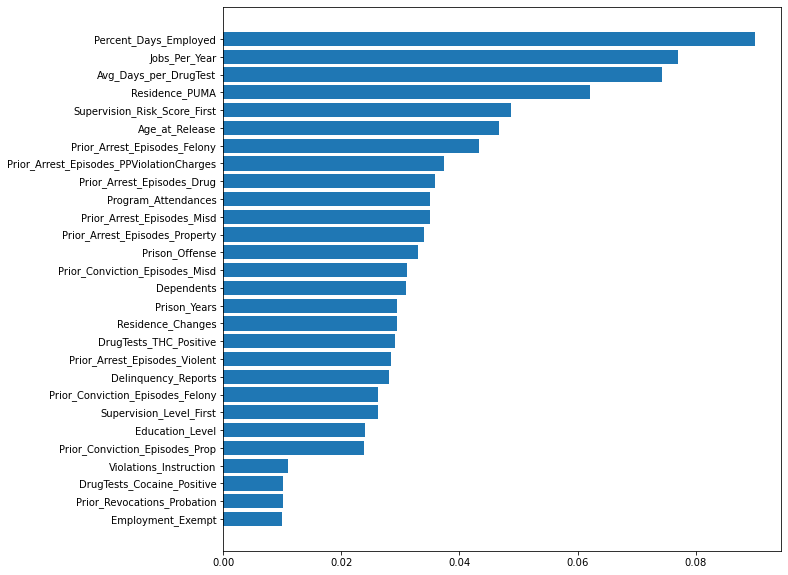

In [97]:
model_features=model.feature_importances_.argsort()
plt.figure(figsize=(10,10))
plt.barh(X.columns.values[model_features],model.feature_importances_[model_features])